<a href="https://colab.research.google.com/github/monikapriya-ai/Addition/blob/main/Copy_of_future_interns_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- 1. SETUP: IMPORT LIBRARIES ---

# Import pandas to work with data tables (DataFrames).
import pandas as pd
# Import matplotlib and seaborn for creating charts.
import matplotlib.pyplot as plt
import seaborn as sns
# Import numpy for numerical operations, needed for the radar chart.
import numpy as np


In [ ]:
# --- 2. DATA LOADING
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Load the file (make sure name matches exactly!)
df = pd.read_csv("student_feedback.csv")

print(df.head())


Saving student_feedback.csv to student_feedback.csv
   Unnamed: 0  Student ID  Well versed with the subject  \
0           0         340                             5   
1           1         253                             6   
2           2         680                             7   
3           3         806                             9   
4           4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7                     6   
3                                           6                     7   
4                                          10                     8   

   Degree of difficulty of assignments  Solves doubts willingly  \
0                                    6                        9   
1                               

In [ ]:
# Remove the first column which is an unnecessary index.
df = df.iloc[:, 1:]

In [ ]:
# Define shorter, more convenient names for the columns.
new_column_names = {
    'Student ID': 'StudentID',
    'Well versed with the subject': 'SubjectKnowledge',
    'Explains concepts in an understandable way': 'ClarityOfExplanation',
    'Use of presentations': 'PresentationUse',
    'Degree of difficulty of assignments': 'AssignmentDifficulty',
    'Solves doubts willingly': 'DoubtResolution',
    'Structuring of the course': 'CourseStructure',
    'Provides support for students going above and beyond': 'ExtraSupport',
    'Course recommendation based on relevance': 'CourseRecommendation'
}

In [ ]:
# Apply the new names to the DataFrame.
df.rename(columns=new_column_names, inplace=True)
# Create a list of just the columns that have ratings.
rating_columns = list(new_column_names.values())[1:]

In [ ]:
# --- 3. SENTIMENT ANALYSIS ---

# Define a function to convert a numerical rating into a sentiment category.
def get_sentiment(rating):
    # Convert the rating to a number to be safe.
    rating_as_number = int(rating)
    # If rating is 8 or higher, it's 'Positive'.
    if rating_as_number >= 8:
        return 'Positive'
    # If rating is between 4 and 7, it's 'Neutral'.
    elif rating_as_number >= 4:
        return 'Neutral'
    # Otherwise, it's 'Negative'.
    else:
        return 'Negative'

        # Apply this function to every rating in the DataFrame to get a sentiment for each.
sentiment_df = df[rating_columns].applymap(get_sentiment)


/tmp/ipython-input-1617475784.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sentiment_df = df[rating_columns].applymap(get_sentiment)


In [ ]:
# --- 4. VISUALIZATIONS ---

Generating Chart 1: Distribution of Ratings...


/tmp/ipython-input-2492534236.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette='magma')
/tmp/ipython-input-2492534236.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette='magma')
/tmp/ipython-input-2492534236.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette='magma')
/tmp/ipython-input-2492534236.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

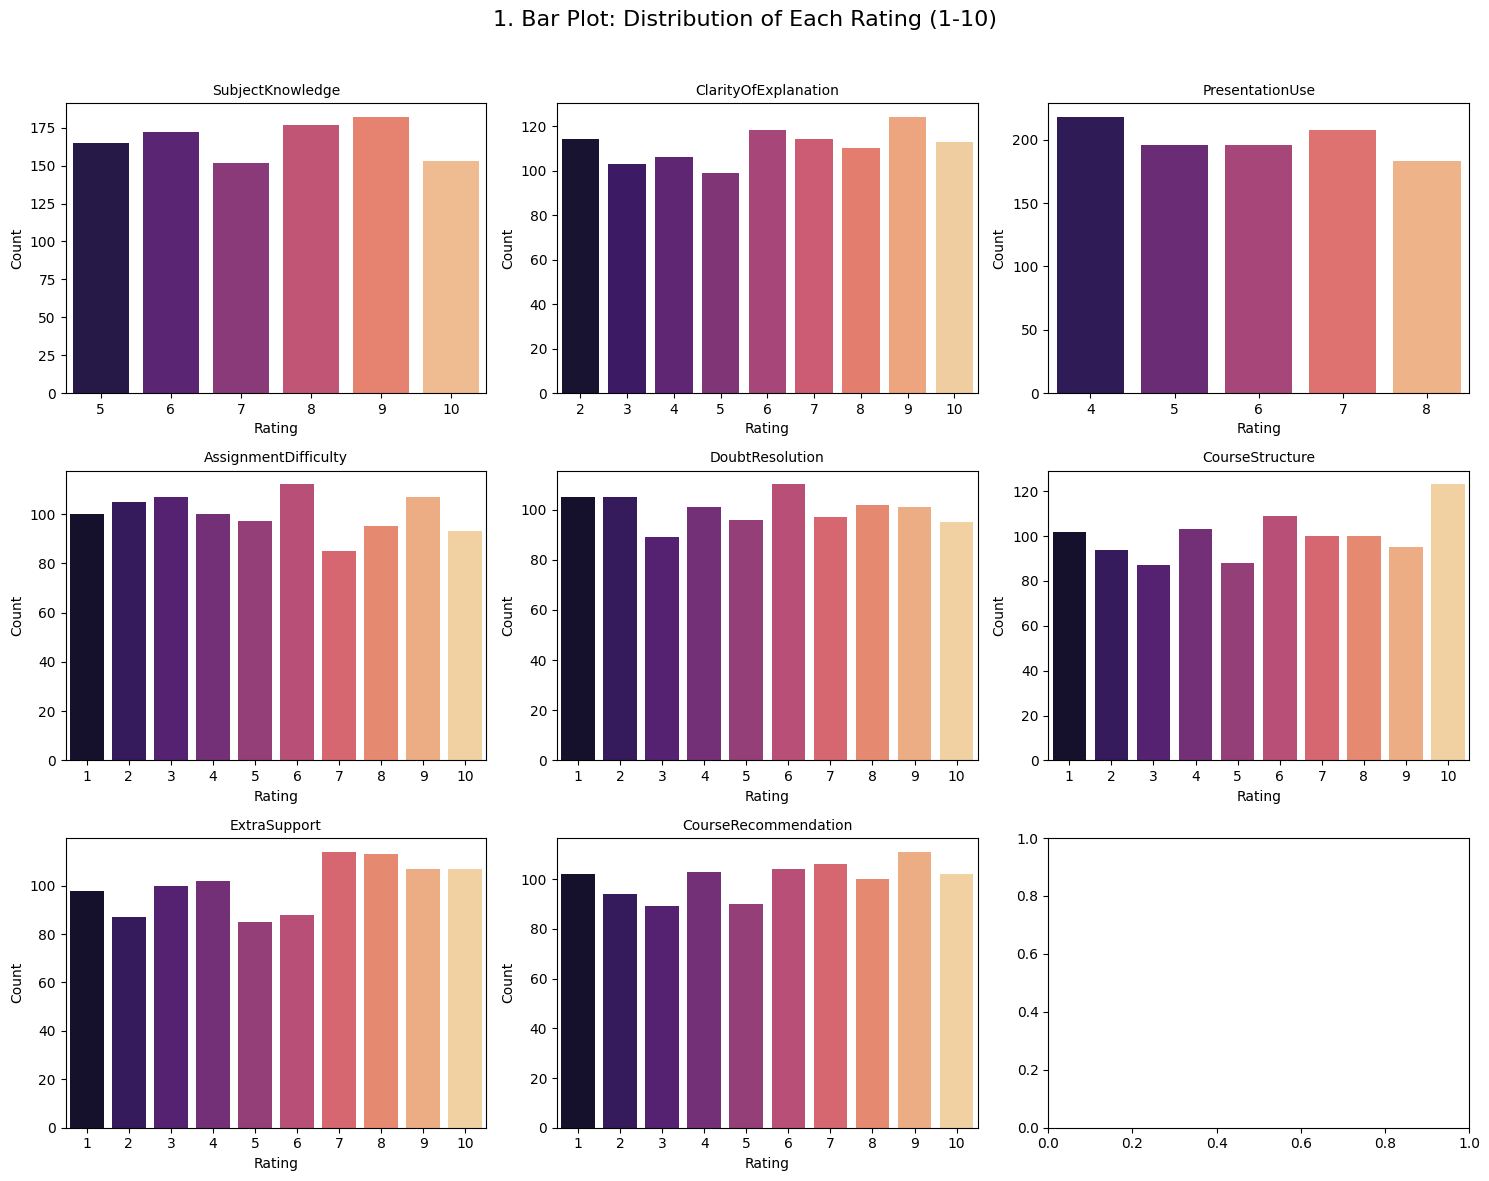

In [ ]:
## CHART 1: Bar Plot (Distribution of Ratings for Each Question)
print("Generating Chart 1: Distribution of Ratings...")
# Create a grid of subplots to hold each bar chart.
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
# Flatten the axes array to make it easy to loop through.
axes = axes.flatten()
# Loop through each rating column to create a separate plot.
for i, col in enumerate(rating_columns):
    # Create a count plot (a bar chart showing counts of each value).
    sns.countplot(x=df[col], ax=axes[i], palette='magma')
    # Set the title for each individual subplot.
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Count')
# Add a main title for the entire figure.
plt.suptitle('1. Bar Plot: Distribution of Each Rating (1-10)', fontsize=16)
# Adjust the layout to prevent titles from overlapping.
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Generating Chart 2: Correlation Heatmap...


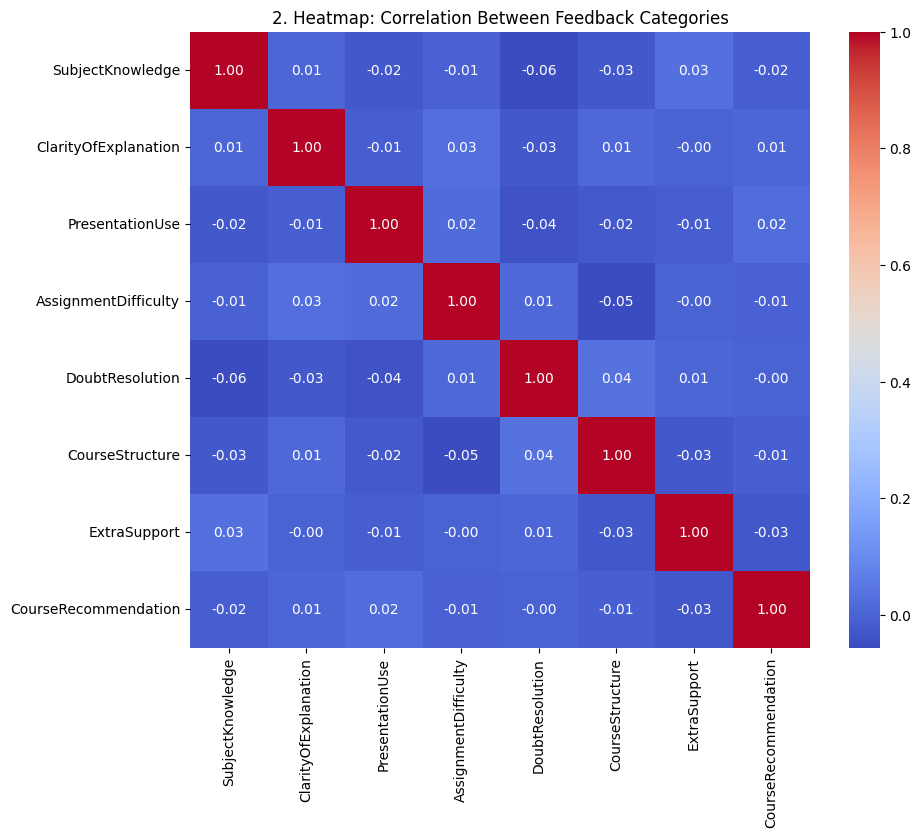

In [ ]:
## CHART 2: Heatmap (Correlation Matrix)
print("Generating Chart 2: Correlation Heatmap...")
# Calculate the correlation between each pair of rating columns.
correlation_matrix = df[rating_columns].corr()
# Set the size of the figure.
plt.figure(figsize=(10, 8))
# Create the heatmap, with annotations (annot=True) and a color map.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# Set the chart title.
plt.title('2. Heatmap: Correlation Between Feedback Categories')
plt.show()

Generating Chart 3: Overall Sentiment Pie Chart...


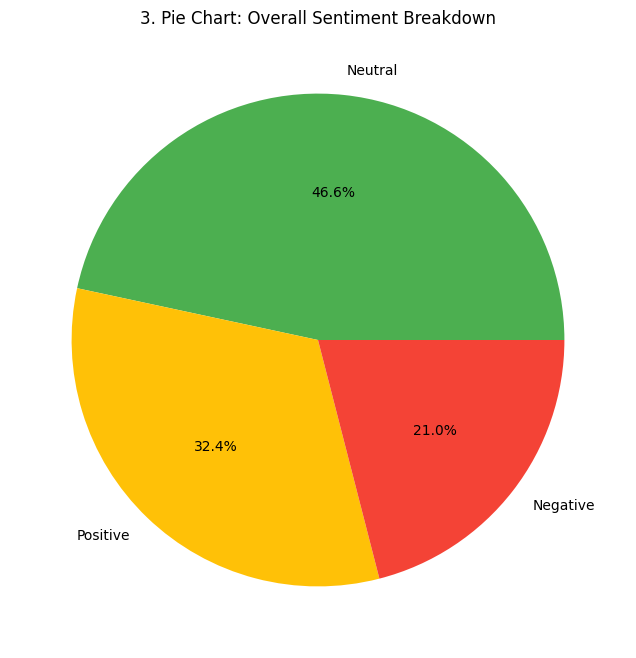

In [ ]:
## CHART 3: Pie Chart (Overall Sentiment Breakdown)
print("Generating Chart 3: Overall Sentiment Pie Chart...")
# Count the total number of 'Positive', 'Neutral', and 'Negative' sentiments.
sentiment_counts = sentiment_df.stack().value_counts()
# Set the size of the figure.
plt.figure(figsize=(8, 8))
# Create the pie chart, showing percentages.
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#4CAF50', '#FFC107', '#F44336'])
# Set the chart title.
plt.title('3. Pie Chart: Overall Sentiment Breakdown')
plt.show()

Generating Chart 4: Box Plot...


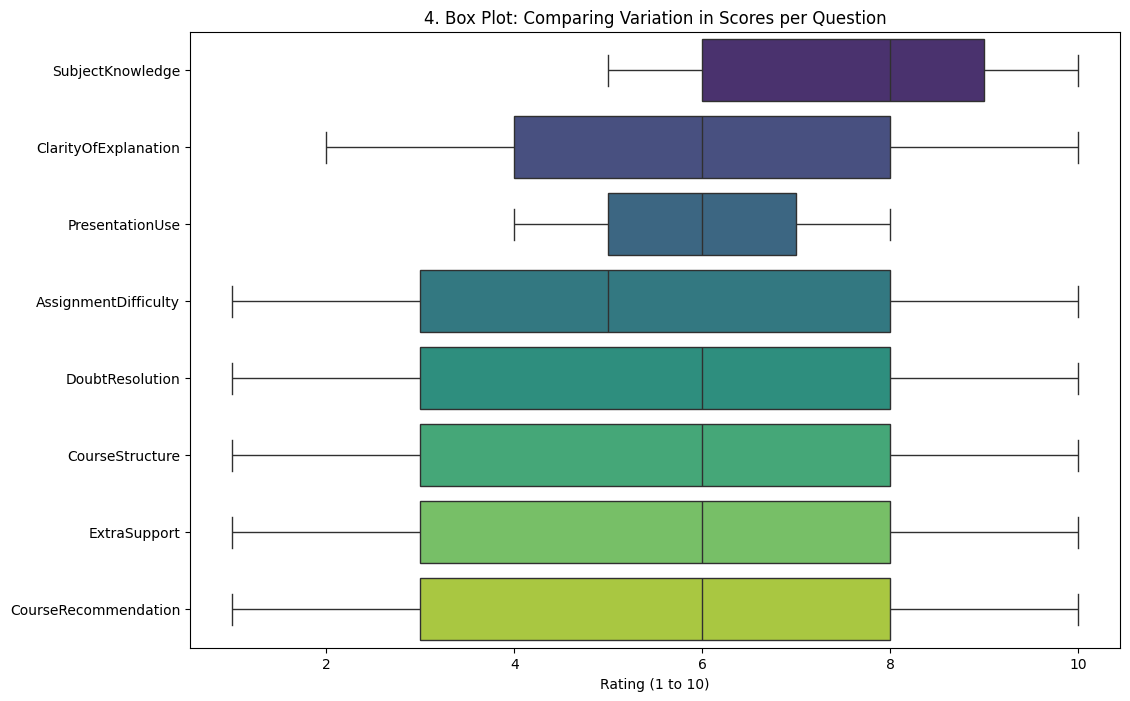

In [ ]:
## CHART 4: Box Plot (Compare Variation in Scores)
print("Generating Chart 4: Box Plot...")
# Set the size of the figure.
plt.figure(figsize=(12, 8))
# Create the box plot with horizontal orientation.
sns.boxplot(data=df[rating_columns], orient='h', palette='viridis')
# Set the title and labels.
plt.title('4. Box Plot: Comparing Variation in Scores per Question')
plt.xlabel('Rating (1 to 10)')
plt.show()

Generating Chart 5: Stacked Bar Chart...


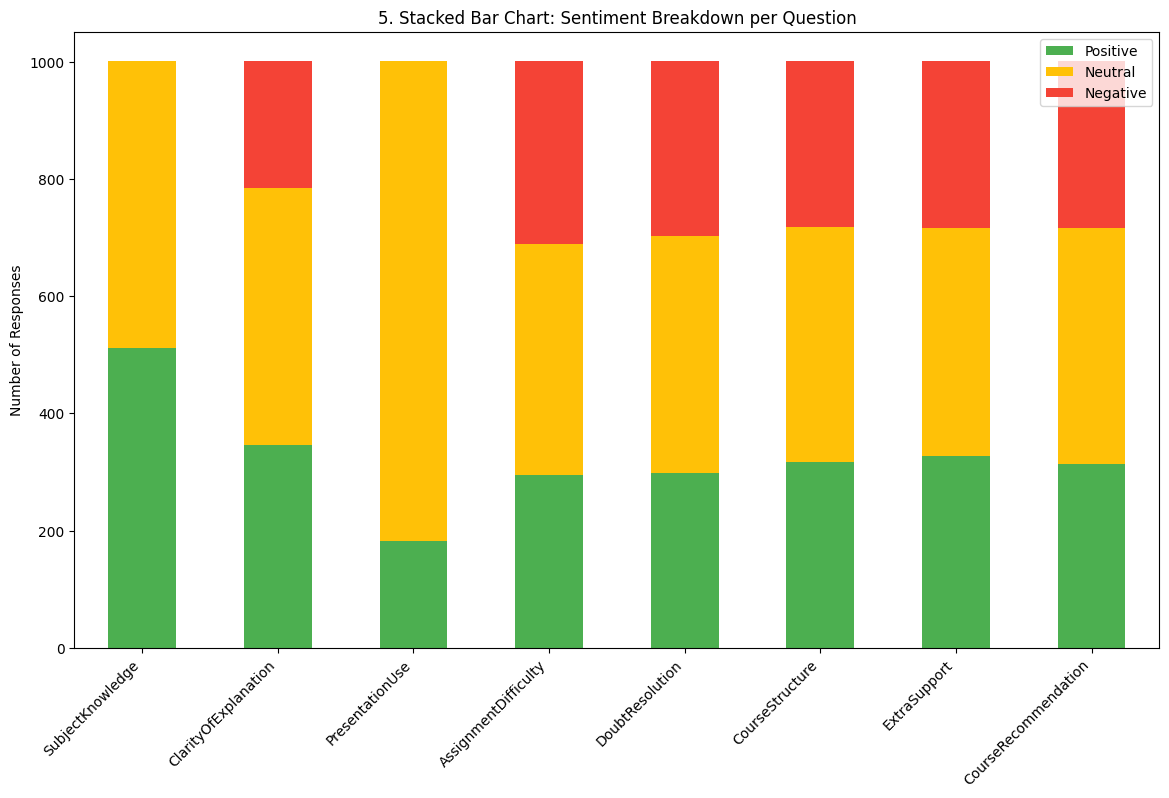

In [ ]:
## CHART 5: Stacked Bar Chart (Ratings vs. Sentiments)
print("Generating Chart 5: Stacked Bar Chart...")
# Count the sentiments for each specific question.
sentiment_per_question = sentiment_df.apply(pd.Series.value_counts).T
# Ensure the columns are in a logical order for stacking.
sentiment_per_question = sentiment_per_question[['Positive', 'Neutral', 'Negative']]
# Create the stacked bar plot.
sentiment_per_question.plot(kind='bar', stacked=True, color=['#4CAF50', '#FFC107', '#F44336'], figsize=(14, 8))
# Set the title and labels.
plt.title('5. Stacked Bar Chart: Sentiment Breakdown per Question')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45, ha='right')
plt.show()

Generating Chart 6: Radar Chart...


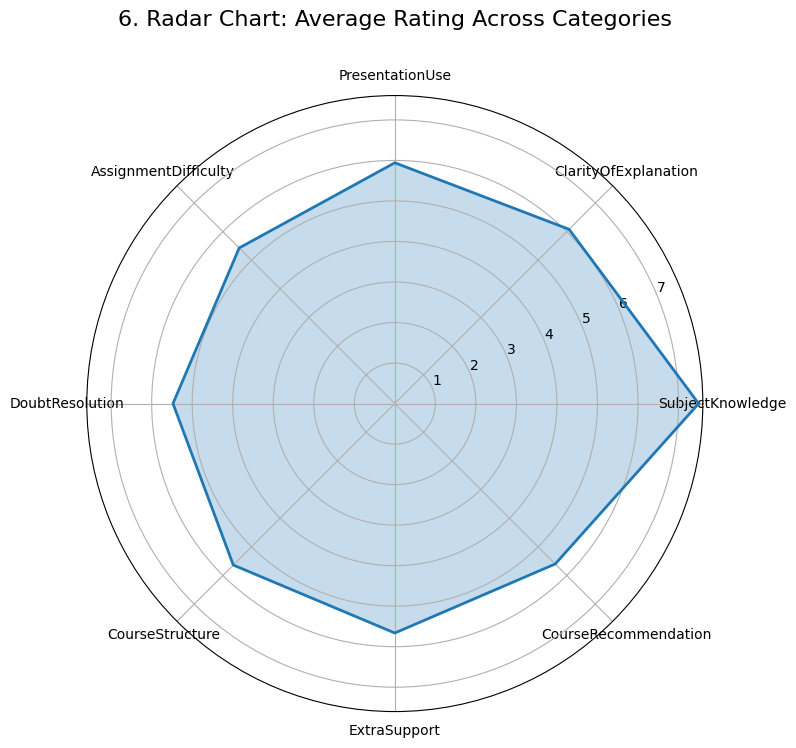


All charts have been generated successfully!


In [ ]:
## CHART 6: Radar Chart (Average Rating Across Categories)
print("Generating Chart 6: Radar Chart...")
# Calculate the average rating for each column.
avg_ratings = df[rating_columns].mean().tolist()
# Get the category names for the labels.
labels = rating_columns
# Count the number of categories.
num_vars = len(labels)
# Calculate the angle for each axis on the radar chart.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
# Close the loop by repeating the first value at the end.
avg_ratings += avg_ratings[:1]
angles += angles[:1]
# Create the polar plot.
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
# Draw the line and fill the area.
ax.plot(angles, avg_ratings, linewidth=2)
ax.fill(angles, avg_ratings, alpha=0.25)
# Set the labels for each axis.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
# Set the chart title.
plt.title('6. Radar Chart: Average Rating Across Categories', size=16, y=1.1)
plt.show()

print("\nAll charts have been generated successfully!")

Saving student_feedback.csv to student_feedback.csv
   Unnamed: 0  Student ID  Well versed with the subject  \
0           0         340                             5   
1           1         253                             6   
2           2         680                             7   
3           3         806                             9   
4           4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7                     6   
3                                           6                     7   
4                                          10                     8   

   Degree of difficulty of assignments  Solves doubts willingly  \
0                                    6                        9   
1                               

/tmp/ipython-input-3455545769.py:42: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sentiment_df = df[rating_columns].applymap(get_sentiment)


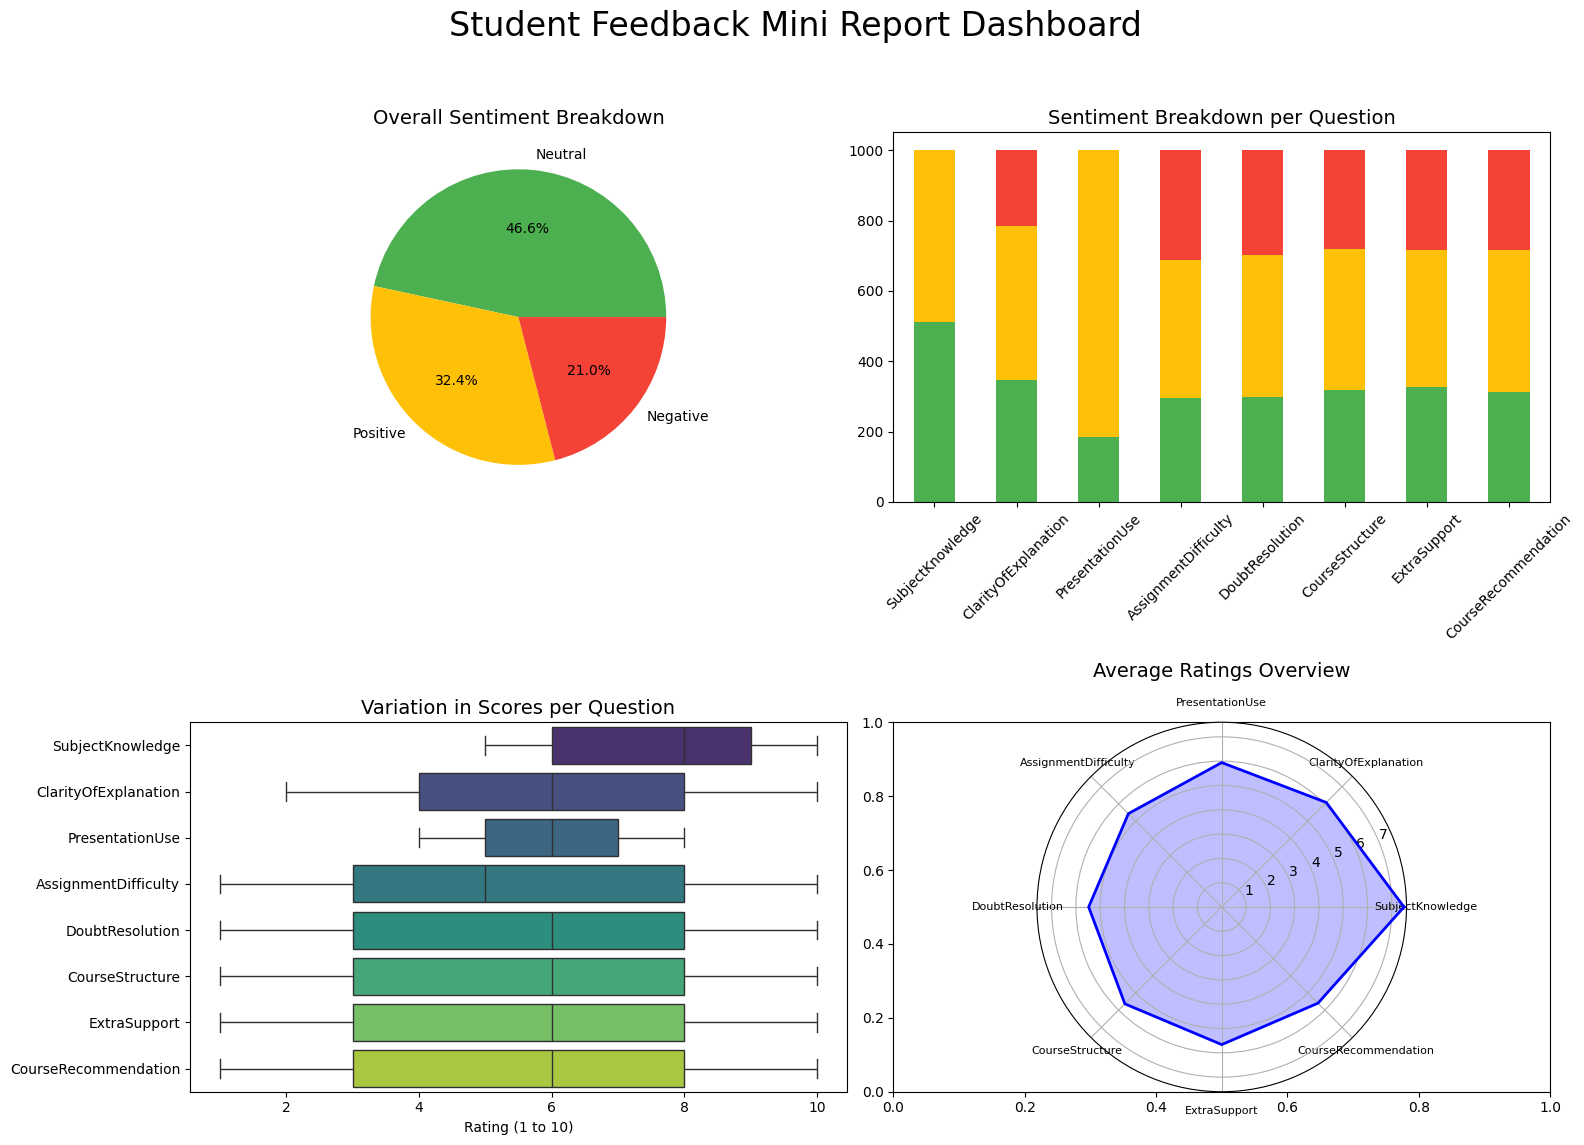

In [ ]:
# --- 1. SETUP: IMPORT ALL NECESSARY LIBRARIES ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 2. DATA LOADING AND CLEANING ---
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Load the file (make sure name matches exactly!)
df = pd.read_csv("student_feedback.csv")

print(df.head())

# Remove the first unnecessary index column.
df = df.iloc[:, 1:]

# Define and apply shorter, more convenient column names.
new_column_names = {
    'Student ID': 'StudentID', 'Well versed with the subject': 'SubjectKnowledge',
    'Explains concepts in an understandable way': 'ClarityOfExplanation', 'Use of presentations': 'PresentationUse',
    'Degree of difficulty of assignments': 'AssignmentDifficulty', 'Solves doubts willingly': 'DoubtResolution',
    'Structuring of the course': 'CourseStructure', 'Provides support for students going above and beyond': 'ExtraSupport',
    'Course recommendation based on relevance': 'CourseRecommendation'
}
df.rename(columns=new_column_names, inplace=True)
rating_columns = list(new_column_names.values())[1:]

# --- 3. SENTIMENT ANALYSIS ---
# Define the function to categorize ratings.
def get_sentiment(rating):
    rating_as_number = int(rating)
    if rating_as_number >= 8: return 'Positive'
    elif rating_as_number >= 4: return 'Neutral'
    else: return 'Negative'

# Apply the function to create the sentiment data.
sentiment_df = df[rating_columns].applymap(get_sentiment)


# --- 4. CREATE THE FINAL DASHBOARD ---
# Create a 2x2 grid of subplots.
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Student Feedback Mini Report Dashboard', fontsize=24)

## Top-Left: Overall Sentiment Pie Chart
sentiment_counts = sentiment_df.stack().value_counts()
ax[0, 0].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#4CAF50', '#FFC107', '#F44336'])
ax[0, 0].set_title('Overall Sentiment Breakdown', fontsize=14)

## Top-Right: Sentiment Breakdown per Question
sentiment_per_question = sentiment_df.apply(pd.Series.value_counts).T
sentiment_per_question = sentiment_per_question[['Positive', 'Neutral', 'Negative']]
sentiment_per_question.plot(kind='bar', stacked=True, color=['#4CAF50', '#FFC107', '#F44336'], ax=ax[0, 1], legend=False)
ax[0, 1].set_title('Sentiment Breakdown per Question', fontsize=14)
ax[0, 1].tick_params(axis='x', rotation=45)

## Bottom-Left: Score Variation Box Plot
sns.boxplot(data=df[rating_columns], orient='h', palette='viridis', ax=ax[1, 0])
ax[1, 0].set_title('Variation in Scores per Question', fontsize=14)
ax[1, 0].set_xlabel('Rating (1 to 10)')

## Bottom-Right: Average Ratings Radar Chart
ax_radar = fig.add_subplot(2, 2, 4, polar=True)
avg_ratings = df[rating_columns].mean().tolist()
labels = rating_columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
avg_ratings += avg_ratings[:1]
angles += angles[:1]
ax_radar.plot(angles, avg_ratings, linewidth=2, color='blue')
ax_radar.fill(angles, avg_ratings, alpha=0.25, color='blue')
ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(labels, size=8)
ax_radar.set_title("Average Ratings Overview", fontsize=14, y=1.1)

# Adjust layout, save, and display the final dashboard.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('student_feedback_dashboard.png')
plt.show()